In [34]:
import pandas as pd
import os
path = os.getcwd()
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [36]:
df = pd.read_csv("diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
x = df.drop(["Outcome"], axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [38]:
y = df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [40]:
myTree = DecisionTreeClassifier(criterion="entropy")

myTree.fit(x_train,y_train)

y_pred = myTree.predict(x_test)

In [41]:
print(tree.export_text(myTree))

|--- feature_1 <= 127.50
|   |--- feature_5 <= 26.45
|   |   |--- feature_5 <= 9.10
|   |   |   |--- feature_0 <= 7.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  7.50
|   |   |   |   |--- class: 1
|   |   |--- feature_5 >  9.10
|   |   |   |--- feature_6 <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.67
|   |   |   |   |--- feature_6 <= 0.71
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.71
|   |   |   |   |   |--- class: 0
|   |--- feature_5 >  26.45
|   |   |--- feature_7 <= 28.50
|   |   |   |--- feature_5 <= 30.95
|   |   |   |   |--- feature_0 <= 7.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  7.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  30.95
|   |   |   |   |--- feature_7 <= 22.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  22.50
|   |   |   |   |   |--- feature_5 <= 45.40
|   |   |   |   |   |   |--- feature_5 <= 38.35
|   |   |   |   |   |   |

[Text(0.4626684131736527, 0.9666666666666667, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.13604041916167664, 0.9, 'x[5] <= 26.45\nentropy = 0.707\nsamples = 389\nvalue = [314, 75]'),
 Text(0.04790419161676647, 0.8333333333333334, 'x[5] <= 9.1\nentropy = 0.181\nsamples = 110\nvalue = [107, 3]'),
 Text(0.023952095808383235, 0.7666666666666667, 'x[0] <= 7.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(0.011976047904191617, 0.7, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.03592814371257485, 0.7, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.0718562874251497, 0.7666666666666667, 'x[6] <= 0.669\nentropy = 0.079\nsamples = 103\nvalue = [102, 1]'),
 Text(0.059880239520958084, 0.7, 'entropy = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.08383233532934131, 0.7, 'x[6] <= 0.705\nentropy = 0.337\nsamples = 16\nvalue = [15, 1]'),
 Text(0.0718562874251497, 0.6333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.095808

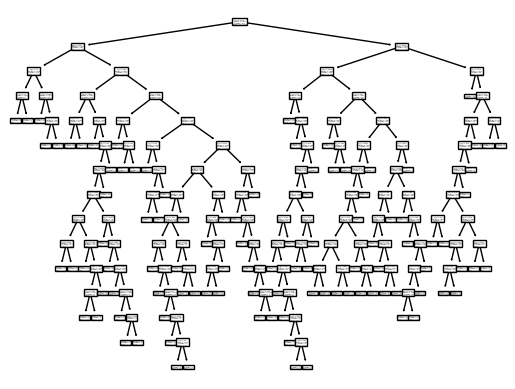

In [43]:
tree.plot_tree(myTree)